# Lab 2 - Regression, DiD, and Fixed Effects
- **Author:** Suraj R. Nair ([suraj.nair@berkeley.edu](mailto:suraj.nair@berkeley.edu)) (based on past labs by Emily Aiken, Qutub Khan Vajihi and Dimitris Papadimitriou)
- **Date:** February 24, 2024
- **Course:** INFO 251: Applied machine learning

### Topics:
1. Linear/ Multivariate Regression
2. Dummy variables
3. Exercises

### References: 
 * [Statsmodels](http://www.statsmodels.org/stable/example_formulas.html#loading-modules-and-functions) 
 * [Interpreting regression coefficients](https://dss.princeton.edu/online_help/analysis/interpreting_regression.htm)
 * [Card and Krueger (1994)](https://davidcard.berkeley.edu/papers/njmin-aer.pdf)
 * Fixed Effects:
      - [Panel Data and Fixed Effects in Python](https://matheusfacure.github.io/python-causality-handbook/14-Panel-Data-and-Fixed-Effects.html)
      - [Notes](https://www.jblumenstock.com/files/courses/econ174/FEModels.pdf) on fixed effects

### Import libraries

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline  

# The packages you'll need for regression models
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Confirm that pandas version is greater than 2
# the default return value for pd.get_dummies is bool for pandas > 2.0.0 
python_version = int(pd.__version__.split(".")[0])
assert python_version >= 2, "Ensure pandas version >=2.0.0" 

In [2]:
df = pd.read_csv("fastfood.csv")

# we split the data into pre and post subsets for convenience
pre = df[df['PERIOD'] == 0].copy()
post = df[df['PERIOD'] == 1].copy()

**CODE UPDATE**: Note that for pandas versions >= 2.0.0, we need to specify "dtype = int" in the pd.get_dummies() function

In [3]:
# Regression with a dummy variable: Syntax option 1
x = pd.get_dummies(pre[['CHAIN']], columns=['CHAIN'], drop_first=True, dtype = int)
x = sm.add_constant(x)
y = pre['EMP']
print(sm.OLS(y, x).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    EMP   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     39.61
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           2.12e-22
Time:                        20:51:20   Log-Likelihood:                -1517.6
No. Observations:                 399   AIC:                             3043.
Df Residuals:                     395   BIC:                             3059.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.4759      0.847     35.989      0.0

# Exercises:


1. On average, prior to the wage increase, is the average employment in New Jersy and Pennsylvania similar? 

In [4]:
print("Pennsylvania Mean Employment (Pre): ", pre[pre['STATE'] == 0]['EMP'].mean().round(2))
print("New Jersey Mean Employment (Pre): ", pre[pre['STATE'] == 1]['EMP'].mean().round(2))

## Pre-treatment, establishments in New Jersey employ ~3 fewer persons, on average

Pennsylvania Mean Employment (Pre):  29.69
New Jersey Mean Employment (Pre):  26.32


2. Calculate the average change in employment, for the following groups (difference in means):
    
    - Pennsylvania v/s New Jersey (Post-period only, i.e PERIOD = 1)
    - Pennsylvania v/s New Jersey (Pre-period only, i.e PERIOD = 0)
    - Pre v/s Post in Pennsylvania
    - Pre v/s Post in New Jersey 
    - Differences-in-difference

In [5]:
#Pennsylvania v/s New Jersey (Post-period only, i.e PERIOD = 1)
post_mean_diff = (post[post['STATE'] == 1]['EMP'].mean() - post[post['STATE'] == 0]['EMP'].mean())

#Pennsylvania v/s New Jersey (Pre-period only, i.e PERIOD = 0)
pre_mean_diff = pre[pre['STATE'] == 1]['EMP'].mean() - pre[pre['STATE'] == 0]['EMP'].mean()

#Pre v/s Post in Pennsylvania
pre_post_penn = df[(df['STATE'] == 0) & (df['PERIOD'] == 1)]['EMP'].mean() - \
                df[(df['STATE'] == 0) & (df['PERIOD'] == 0)]['EMP'].mean()

#Pre v/s Post in New Jersey

pre_post_nj = df[(df['STATE'] == 1) & (df['PERIOD'] == 1)]['EMP'].mean() - \
                df[(df['STATE'] == 1) & (df['PERIOD'] == 0)]['EMP'].mean()

#Differences-in-difference

print("Average change in Employment (NJ v/s Penn, post period):", post_mean_diff.round(3))
print("Average change in Employment (NJ v/s Penn, pre period):", pre_mean_diff.round(3))
print("Average change in Employment in Pennsylvania, (Pre v/s Post)):", pre_post_penn.round(3))
print("Average change in Employment in New Jersey, (Pre v/s Post)):", pre_post_nj.round(3))
# Double difference v1: changes post the intervention, minus changes pre intervention
print("Double Difference Estimate v1:", (post_mean_diff - pre_mean_diff).round(3))
# Double difference v2: Pre-post change in NJ (i.e the Treatment group) minus pre-post change in Pennsylvania (Control)
print("Double Difference Estimate v2:", (pre_post_nj- pre_post_penn).round(3))



Average change in Employment (NJ v/s Penn, post period): -0.761
Average change in Employment (NJ v/s Penn, pre period): -3.368
Average change in Employment in Pennsylvania, (Pre v/s Post)): -2.219
Average change in Employment in New Jersey, (Pre v/s Post)): 0.389
Double Difference Estimate v1: 2.607
Double Difference Estimate v2: 2.607


3. Now, let's do the same thing, but using linear regression! Let's focus on differences between Pennsylvania and New Jersey in the pre-period only. What do you observe?



In [6]:
m1 = smf.ols("EMP ~ STATE", pre).fit()
m1.summary()

### Note that we recover the difference in means that we manually calculated above using this regression.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EMP   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     4.675
Date:                Sun, 28 Jan 2024   Prob (F-statistic):             0.0312
Time:                        20:51:20   Log-Likelihood:                -1567.8
No. Observations:                 399   AIC:                             3140.
Df Residuals:                     397   BIC:                             3148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.6923      1.397     21.251      0.000      26.945      32.439
STATE         -3.3683      1.558     -2.162      0.031      -6.431      -0.306
==============================================================================
Omnibus:                      124.338   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.665
Skew:                           1.379   Prob(JB):                     4.11e-95
Kurtosis:                       7.306   Cond. No.                         4.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4. Let's see what happens when we add a control variable. Let's control for the number of hours (HRSOPEN) 

In [7]:
m2 = smf.ols("EMP ~ STATE + HRSOPEN", pre).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EMP   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     95.46
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           1.46e-34
Time:                        20:51:20   Log-Likelihood:                -1491.6
No. Observations:                 399   AIC:                             2989.
Df Residuals:                     396   BIC:                             3001.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.9680      2.871     -2.079      0.038     -11.613      -0.323
STATE         -3.2507      1.289     -2.522      0.012      -5.784      -0.717
HRSOPEN        2.4626      0.182     13.568      0.000       2.106       2.819
==============================================================================
Omnibus:                      112.033   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.592
Skew:                           1.310   Prob(JB):                     5.41e-71
Kurtosis:                       6.550   Cond. No.                         84.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5. Plot the regression line/ line of best fit in the treatment and the control groups

In [8]:
# Our goal is to create 
# i) a scatterplot of EMP v/s HRSOPEN,and 
# ii) to overlay the regression lines for T and C, as obtained in 5.

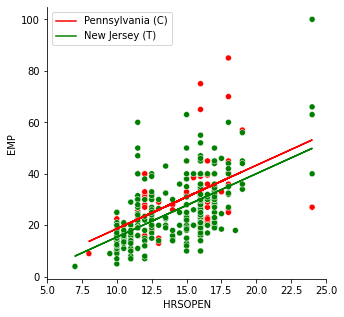

In [9]:
## First, we will do this manually

plt_df = pre.copy() # create a copy of the pre dataframe, just to keep things clean
plt_df['yhat'] = m2.predict() # Get the fitted values from the model (i.e the predictions)

fig, ax = plt.subplots(figsize = (5, 5))

# Scatterplot of the raw values of EMP and HRSOPEN
sns.scatterplot(x = "HRSOPEN", 
                y = "EMP", 
                hue = "STATE", 
                ax = ax, data = 
                plt_df, 
                legend = False, 
                palette= ['red', 'green'])

# Now, we let's plot the regression line for T and C
for group, label, color in [(0, "Pennsylvania (C)", "r-"), 
                            (1, "New Jersey (T)", "g-")
                           ]:
    ax.plot(plt_df[plt_df['STATE'] == group]['HRSOPEN'].values, plt_df[plt_df['STATE'] == group]['yhat'].values, 
            color, label = label)
    
plt.legend()
plt.xlim(5, 25)
sns.despine()
plt.show()

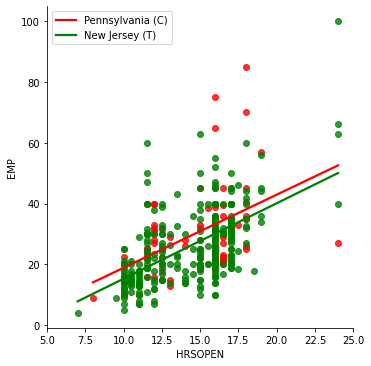

In [10]:
# Now, let's do this using a canned command
# Take a look at the documentation for lmplot here: https://seaborn.pydata.org/generated/seaborn.lmplot.html

# Note that this does not require us to actually run a regression beforehand!

sns.lmplot(data = pre, x = "HRSOPEN", y = "EMP", hue = "STATE", ci = None, palette = ['red', 'green'], legend = False)
plt.legend(['Pennsylvania (C)', 'New Jersey (T)'])
plt.xlim(5, 25)
plt.show()


# Confirm / convince yourself that both these approaches give you the same output

6. Let's finish with a visual assessment of trends in EMP before and after the wage increase, in T and C

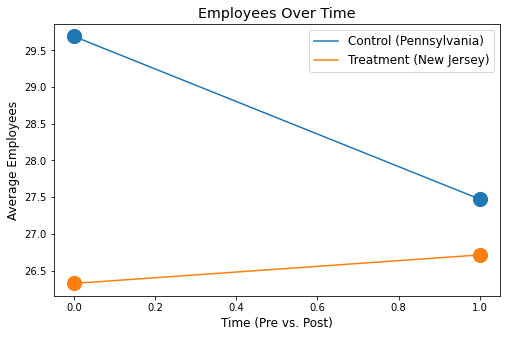

In [11]:

# Let's calculate the mean for the pre and post periods, in both the treatment and control groups. 
control_pre = pre[pre['STATE'] == 0]['EMP'].mean()
treatment_pre = pre[pre['STATE'] == 1]['EMP'].mean()
control_post = post[post['STATE'] == 0]['EMP'].mean()
treatment_post = post[post['STATE'] == 1]['EMP'].mean()


# Now, let's plot this. 
fig = plt.figure(figsize=(8, 5))
plt.scatter([0, 1], [control_pre, control_post], s=200)
plt.plot([0, 1], [control_pre, control_post], label='Control (Pennsylvania)')
plt.scatter([0, 1], [treatment_pre, treatment_post], s=200)
plt.plot([0, 1], [treatment_pre, treatment_post], label='Treatment (New Jersey)')
plt.legend(loc='best', fontsize='large')
plt.xlabel('Time (Pre vs. Post)', fontsize='large')
plt.ylabel('Average Employees', fontsize='large')
plt.title('Employees Over Time', fontsize='x-large')
plt.show()
